# Visualizing Covid-19 Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import operator
import random
import math
import time
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from plotly.subplots import make_subplots

plt.style.use('seaborn')
%matplotlib inline 

In [2]:
confirmed_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_file_link = "https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/covid_19_data.csv"
excel_file = 'per_day_cases.xlsx'

In [3]:
confirmed_cases = pd.read_csv(confirmed_cases_file_link)
print(confirmed_cases.shape)
deaths_reported = pd.read_csv(death_cases_file_link)
print(deaths_reported.shape)
recovered_cases = pd.read_csv(recovered_cases_file_link)
print(recovered_cases.shape)
df = pd.read_csv(df_file_link)
print(df.shape)
dbd_Italy = pd.read_excel(excel_file, parse_dates=True, sheet_name="Italy")
print(dbd_Italy.shape)
dbd_Korea = pd.read_excel(excel_file, parse_dates=True, sheet_name='Korea')
print(dbd_Korea.shape)
dbd_US = pd.read_excel(excel_file, parse_dates=True, sheet_name='US')
print(dbd_US.shape)
dbd_China = pd.read_excel(excel_file, parse_dates=True, sheet_name='China')
print(dbd_China.shape)

(266, 111)
(266, 111)
(252, 111)
(5890, 8)
(93, 5)
(94, 4)
(94, 5)
(94, 4)


## Exploratory Data

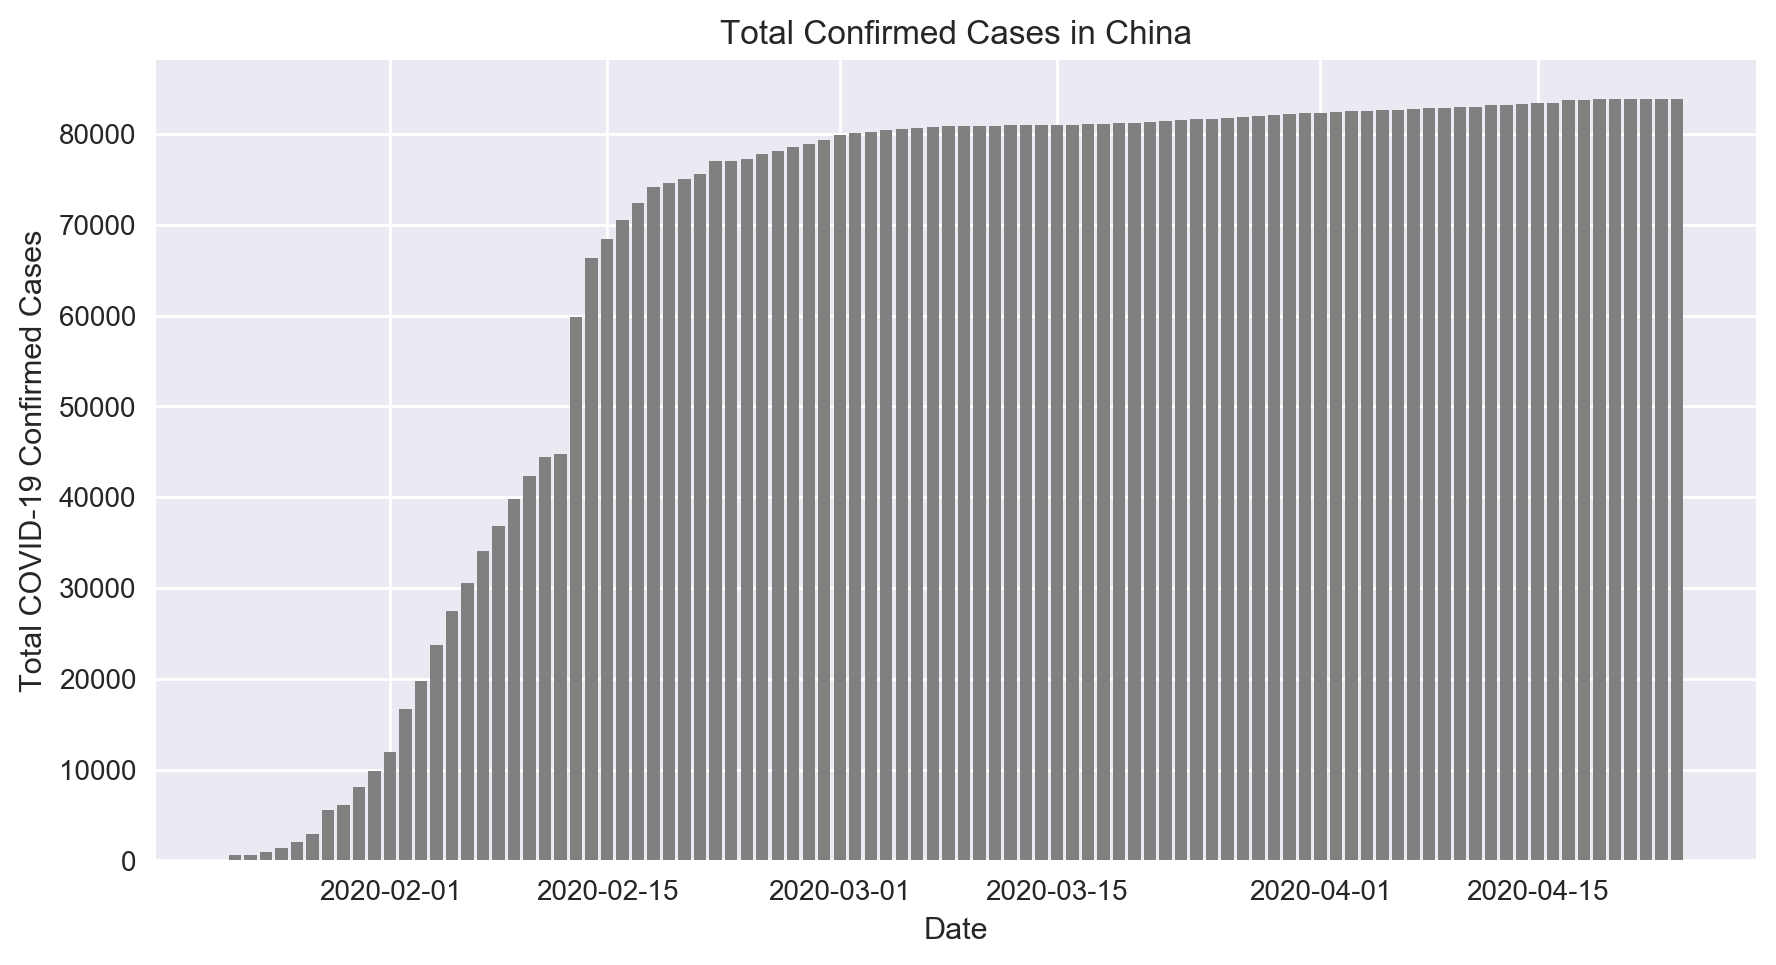

In [4]:
#matplotlib
#plot a bar graph to examine the number of confirmed cases in China over time
fig=plt.figure(figsize=(10,5),dpi=200)
ax=fig.add_axes([0.2,0.2,0.8,0.8])
ax.bar(dbd_China["Date"], dbd_China["Total Cases"], color='grey')
ax.set_xlabel("Date")
ax.set_ylabel("Total COVID-19 Confirmed Cases")
ax.set_title("Total Confirmed Cases in China")
plt.show()

In [5]:
# Create subplots of four pivot countries' data
fig=make_subplots(
        rows=2,cols=2,
        specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
        subplot_titles=("S.Korea","Italy","China","US"))
fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_China['Date'],y=dbd_China['Total Cases'],
                    marker=dict(color=dbd_China['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_US['Date'],y=dbd_US['Total Cases'],
                    marker=dict(color=dbd_US['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

In [6]:
df_latlong=pd.merge(df,confirmed_cases,on=['Country/Region', 'Province/State'])

In [7]:
df_latlong.rename(columns={'ObservationDate':'Date'},inplace=True)

In [8]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwise COVID-19 Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [9]:
confirmed_cases.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  \
0        0        0        0  ...     1828     1939     2171    2335    2469   
1        0        0        0  ...      750      766      773     782     789   
2        0        0        0  ...     3649     3848     4006    4154    4295   
3        0        0        0  ...      743      743      745     745     747   
4        0        0        0  ...       27       27       27      30      35   

   5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  
0    2704    2894    3224    3392    3563  
1     795     803     820     832     842  
2    4474    4648    4838    4997    5182  
3     748     750     751     751     752  
4      35      35      36      36      36  

[5 rows x 111 columns]

In [10]:
deaths_reported.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  \
0        0        0        0  ...       58       60       64      68      72   
1        0        0        0  ...       30       30       31      31      31   
2        0        0        0  ...      437      444      450     453     459   
3        0        0        0  ...       41       42       42      43      44   
4        0        0        0  ...        2        2        2       2       2   

   5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  
0      85      90      95     104     106  
1      31      31      31      31      31  
2     463     465     470     476     483  
3      45      45      46      46      47  
4       2       2       2       2       2  

[5 rows x 111 columns]

In [11]:
confirmed = confirmed_cases.iloc[:, 4:-1]

In [12]:
deaths = deaths_reported.iloc[:, 4:-1]

In [13]:
recoveries = recovered_cases.iloc[:, 4:-1]

In [14]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Finding the total mortality rate which is the death_sum/confirmed_cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [15]:
confirmed_sum

3755341

In [16]:
death_sum

263831

In [17]:
recovered_sum

1245413

In [18]:
# Convert all dates and cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [19]:
len(dates)

106

In [20]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[: -10]

In [21]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [22]:
# For visualization with the latest data 

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [23]:
# Countries with confirmed cases

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [24]:
# Total number of countries with confirmed cases

confirmed_cases["Country/Region"].nunique()

187

In [25]:
# Calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key = operator.itemgetter(1), reverse = True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [26]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 1228603 cases
Spain: 220325 cases
Italy: 214457 cases
United Kingdom: 202359 cases
France: 174224 cases
Germany: 168162 cases
Russia: 165929 cases
Turkey: 131744 cases
Brazil: 126611 cases
Iran: 101650 cases
China: 83970 cases
Canada: 64694 cases
Peru: 54817 cases
India: 52987 cases
Belgium: 50781 cases
Netherlands: 41518 cases
Saudi Arabia: 31938 cases
Ecuador: 31881 cases
Switzerland: 30060 cases
Mexico: 27634 cases
Portugal: 26182 cases
Pakistan: 24073 cases
Sweden: 23918 cases
Chile: 23048 cases
Ireland: 22248 cases
Singapore: 20198 cases
Belarus: 19255 cases
Qatar: 17972 cases
Israel: 16310 cases
United Arab Emirates: 15738 cases
Austria: 15684 cases
Japan: 15253 cases
Poland: 14740 cases
Romania: 14107 cases
Ukraine: 13184 cases
Indonesia: 12438 cases
Bangladesh: 11719 cases
Korea, South: 10810 cases
Denmark: 10136 cases
Philippines: 10004 cases
Serbia: 9791 cases
Colombia: 8959 cases
Dominican Republic: 8807 cases
Norway: 7996 cases
Czec

In [27]:
# number of unique province/states

unique_provinces = list(confirmed_cases['Province/State'].unique())
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [28]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 107 cases
New South Wales: 3044 cases
Northern Territory: 29 cases
Queensland: 1045 cases
South Australia: 438 cases
Tasmania: 226 cases
Victoria: 1454 cases
Western Australia: 551 cases
Alberta: 5963 cases
British Columbia: 2255 cases
Grand Princess: 13 cases
Manitoba: 286 cases
New Brunswick: 120 cases
Newfoundland and Labrador: 259 cases
Nova Scotia: 998 cases
Ontario: 19910 cases
Prince Edward Island: 27 cases
Quebec: 34334 cases
Saskatchewan: 512 cases
Anhui: 991 cases
Beijing: 593 cases
Chongqing: 579 cases
Fujian: 356 cases
Gansu: 139 cases
Guangdong: 1589 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 168 cases
Hebei: 328 cases
Heilongjiang: 944 cases
Henan: 1276 cases
Hong Kong: 1040 cases
Hubei: 68128 cases
Hunan: 1019 cases
Inner Mongolia: 201 cases
Jiangsu: 653 cases
Jiangxi: 937 cases
Jilin: 112 cases
Liaoning: 146 cases
Macau: 45 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 308 cases
Shandong: 788 cases
Shanghai: 657 cases
Shanxi: 

In [29]:
# Get rid of NaN in data frames

nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

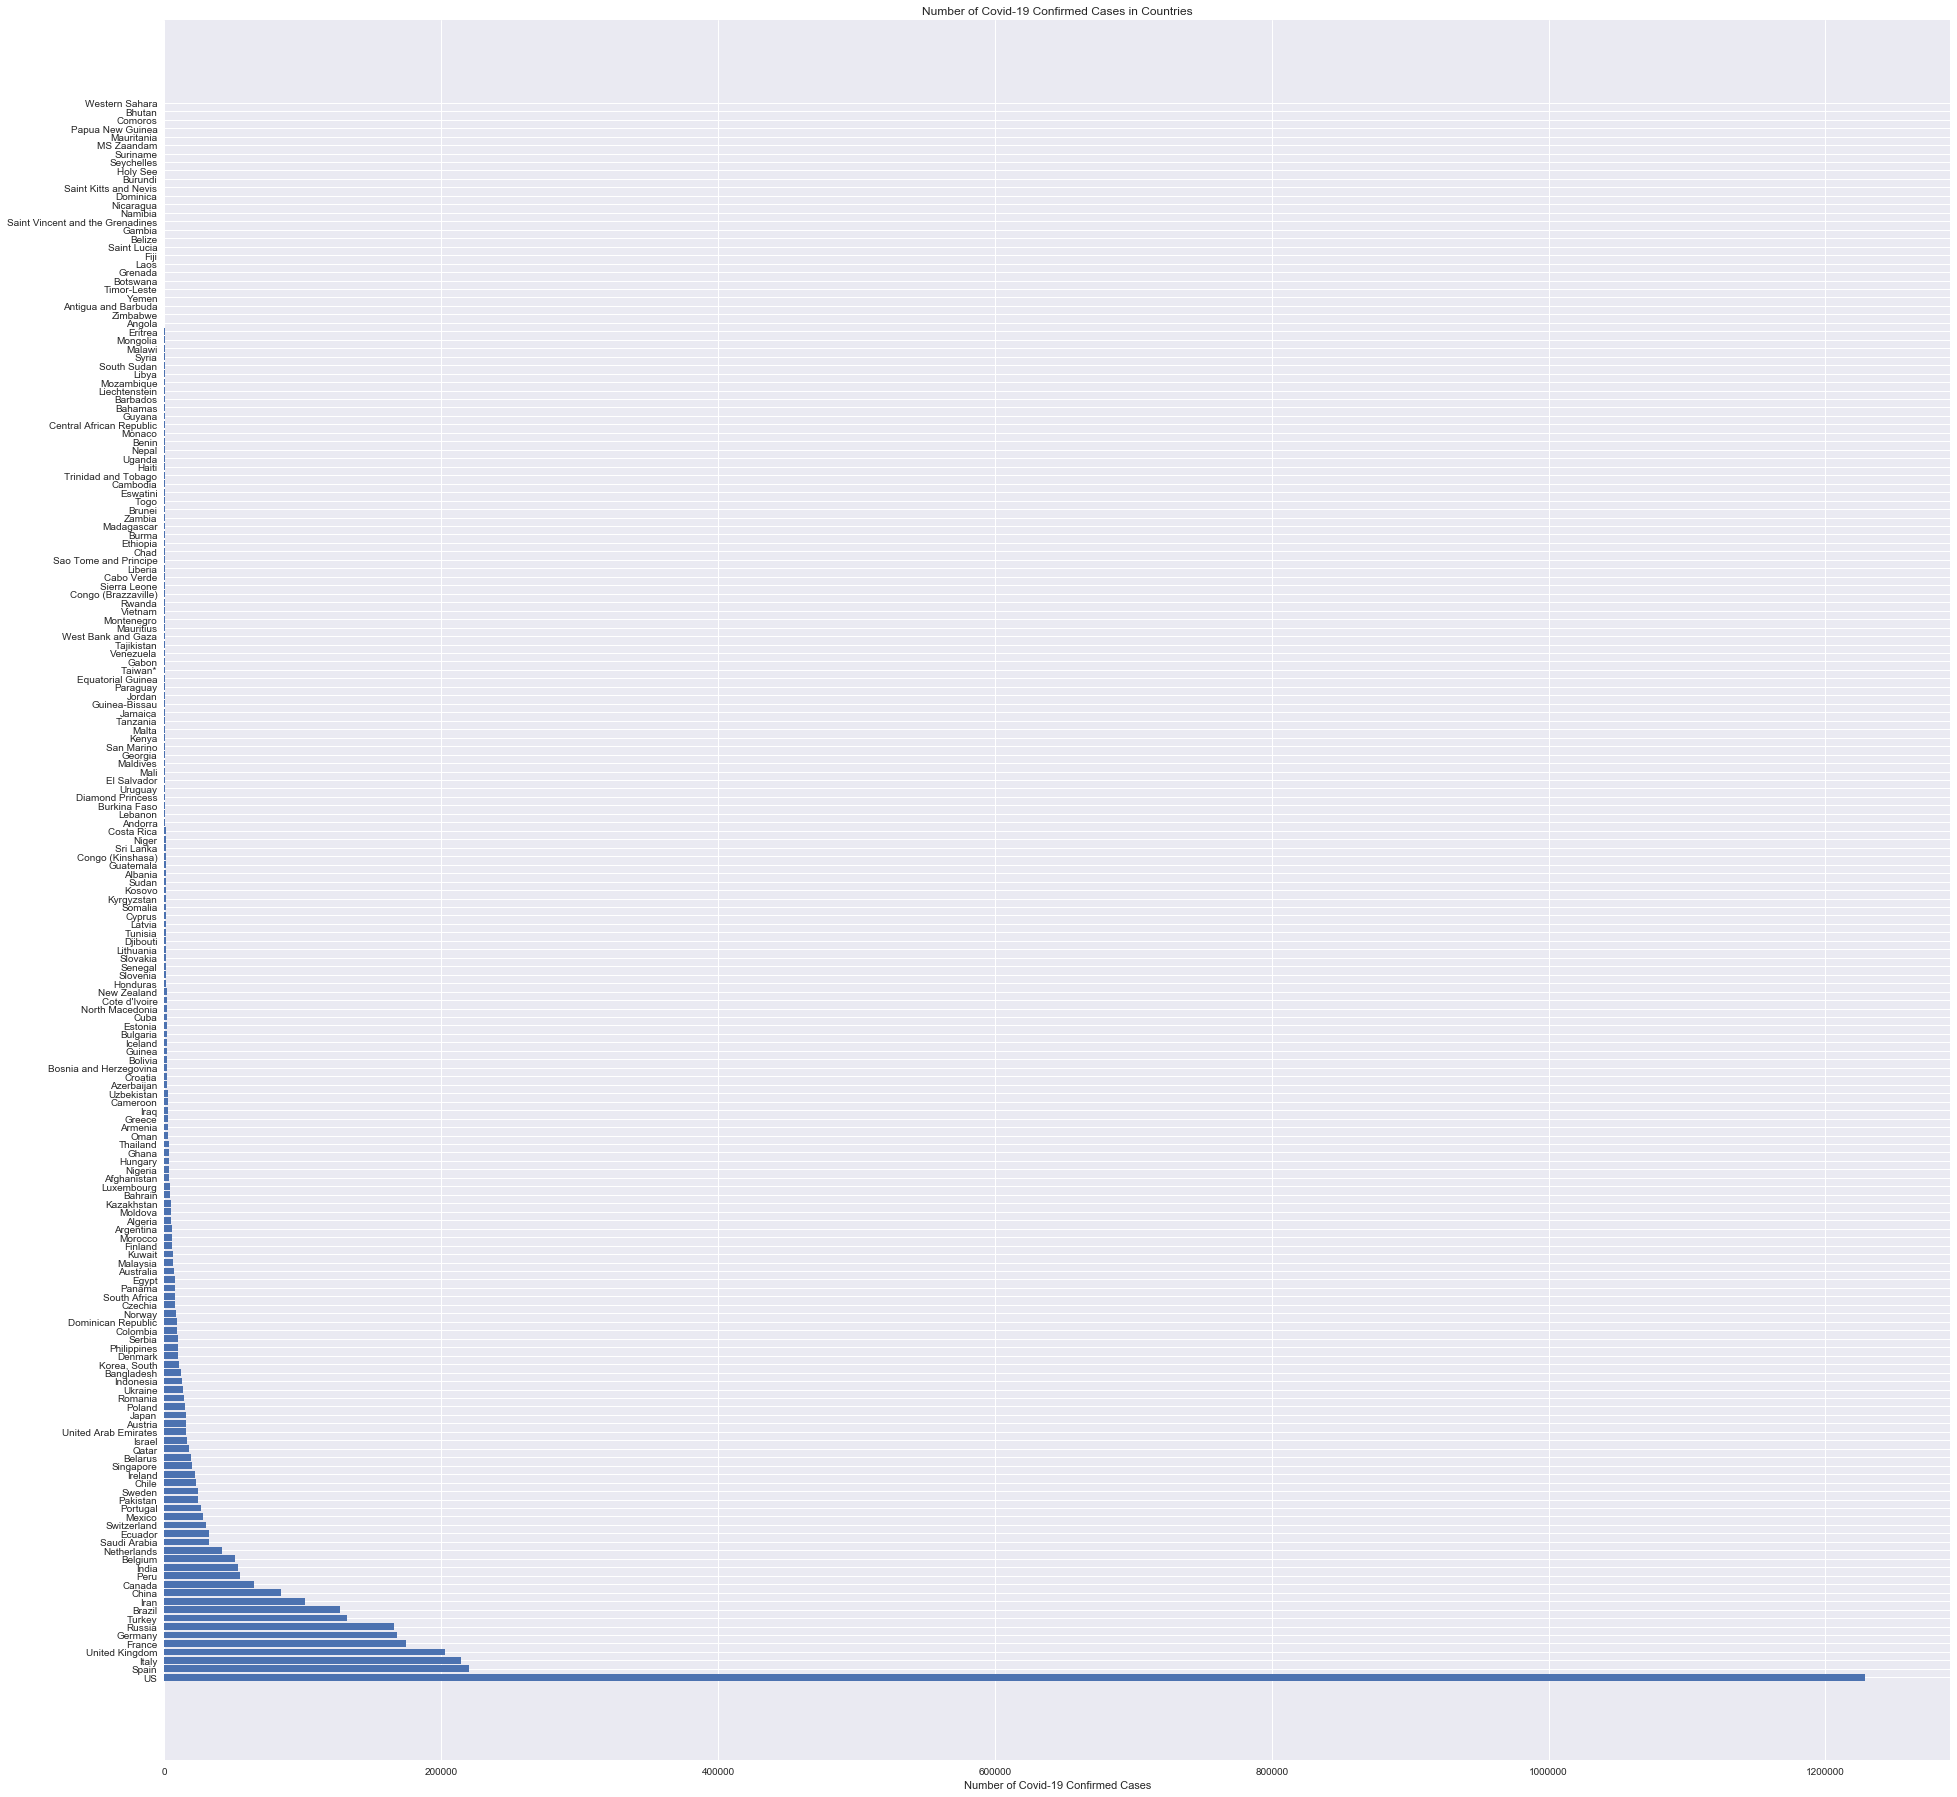

In [30]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

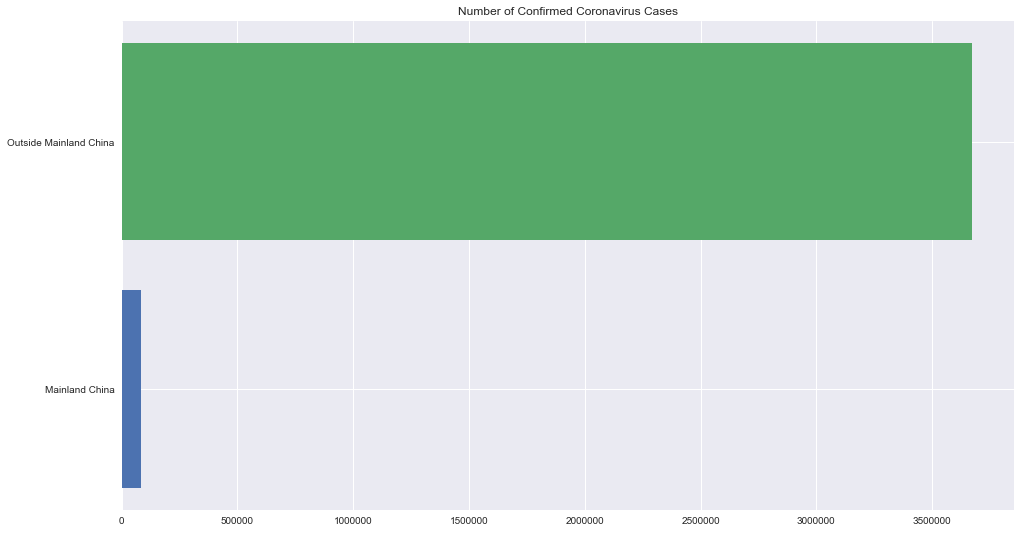

In [31]:
# Plot a bar graph to see the total confirmed cases in and outside of mainland china

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [32]:
# print the total cases in mainland china and outside of it

print('Outside Mainland China: {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China: 3671371 cases
Mainland China: 83970 cases
Total: 3755341 cases


In [33]:
# show the 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

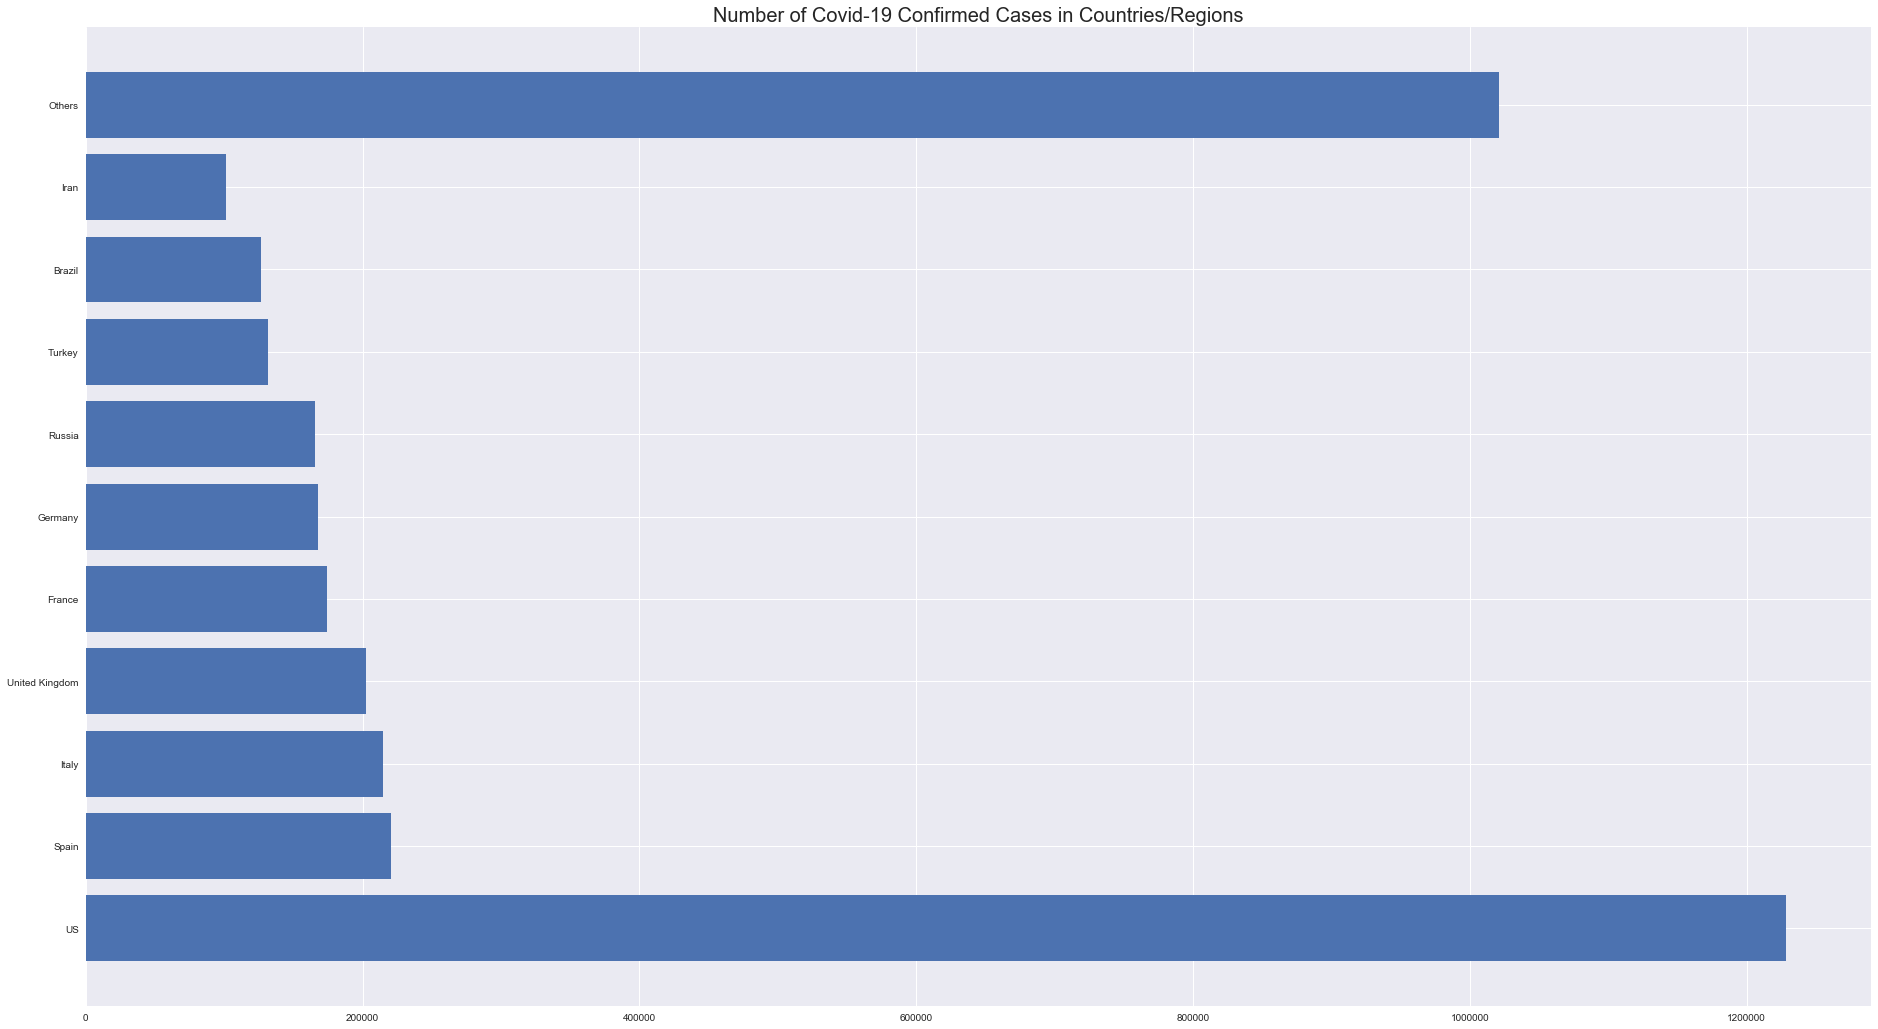

In [34]:
# visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

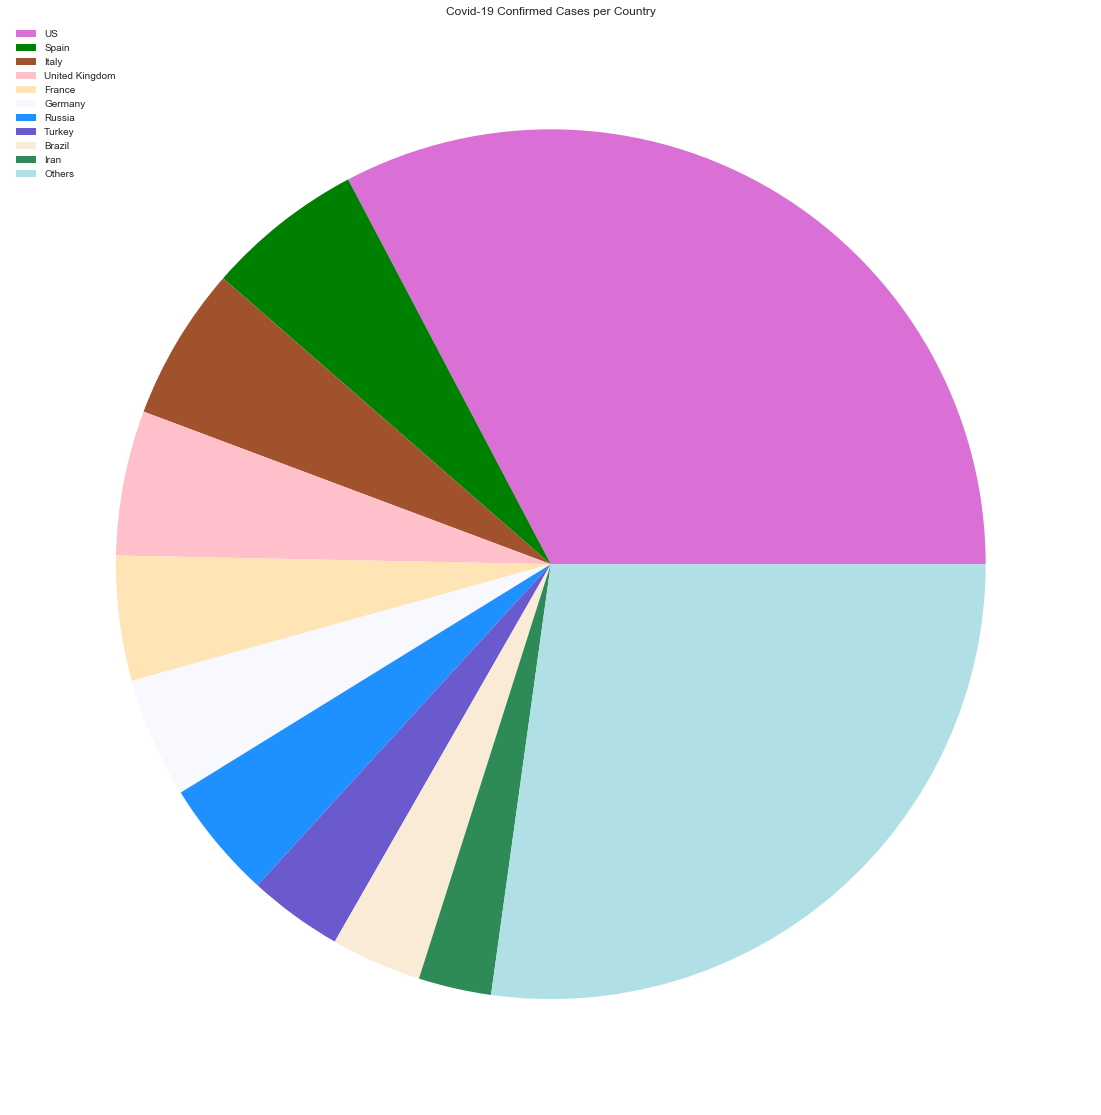

In [35]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors = c)
plt.legend(visual_unique_countries, loc = 'best')
plt.show()

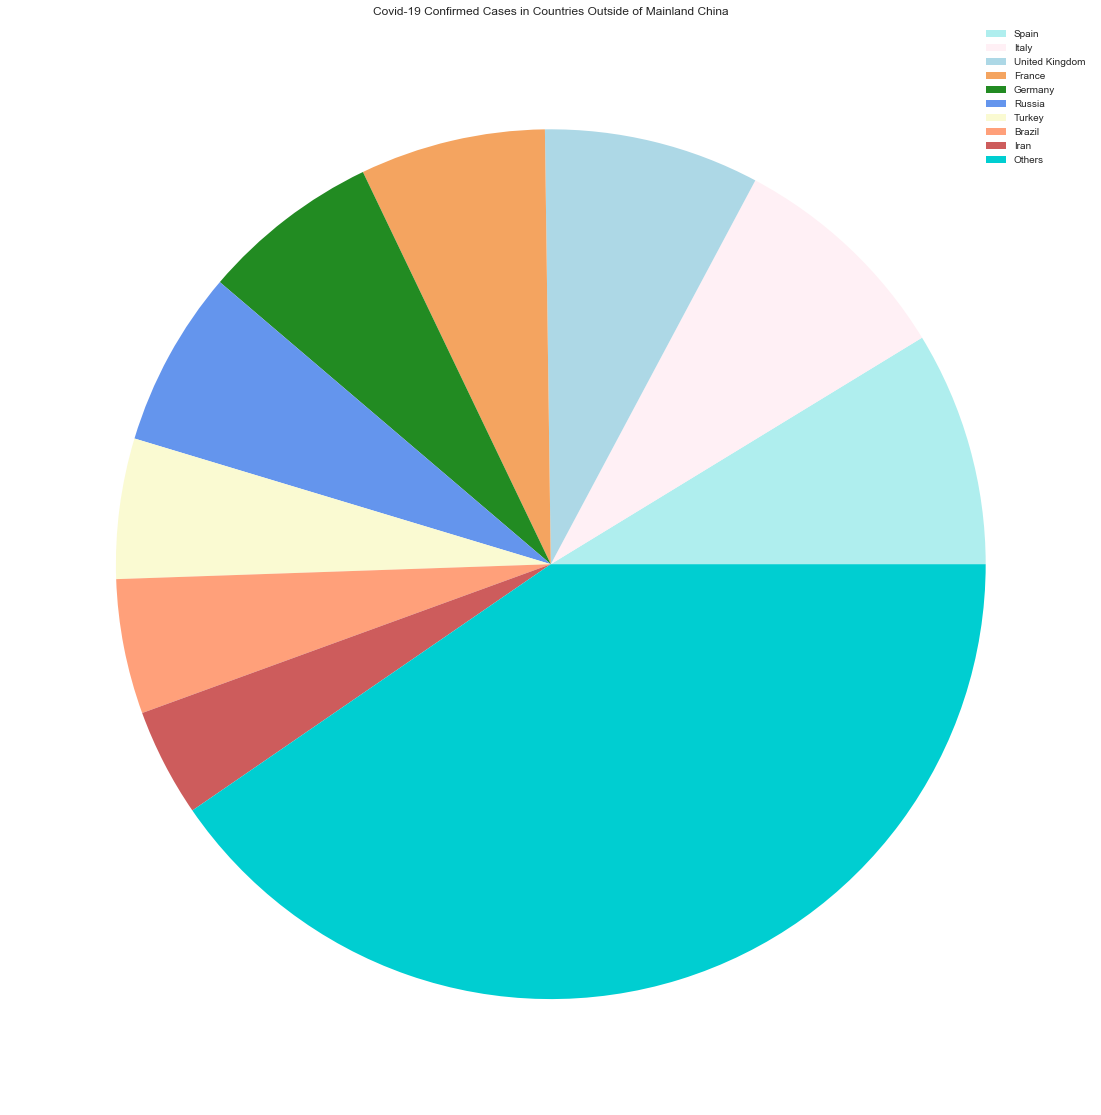

In [36]:
# create a pie chart to see the total confirmed cases in 10 different countries outside China

c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

### Linear Regression

In [37]:
import sklearn

In [38]:
from sklearn.linear_model import LinearRegression

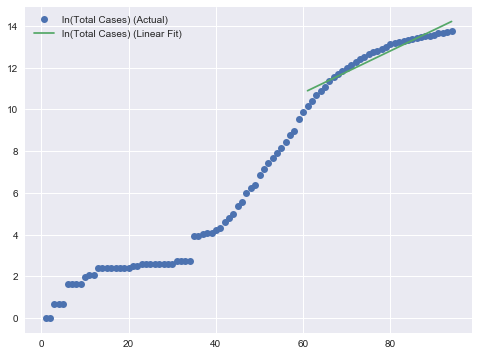

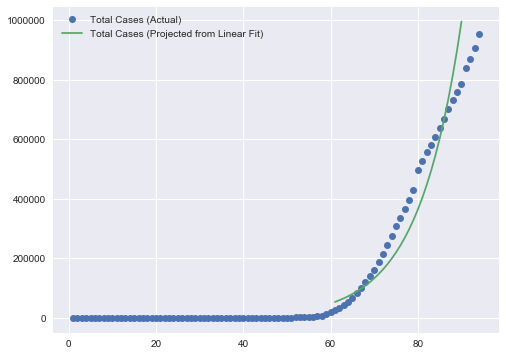

In [39]:
dates = np.linspace(1, len(dbd_US['Date']), len(dbd_US['Date']))
dates = dates[:,np.newaxis]
log_cases = np.log(np.array(dbd_US['Total Cases'], dtype=np.float64))
infs = np.isinf(log_cases)
log_cases[infs] = 0

model =  LinearRegression().fit(dates[60:],log_cases[60:])
pred = model.predict(dates)

dates_into_future = np.linspace(1, 90, 90)
fut_pred = model.predict(dates_into_future[60:, np.newaxis])

plt.figure(figsize=(8, 6)) # Here, we're plotting the natural log of the new cases and the linear model that we've fit to that data. 
plt.plot(dates,  log_cases, 'o', dates[60:], pred[60:])
plt.legend(['ln(Total Cases) (Actual)', 'ln(Total Cases) (Linear Fit)'])
plt.show()

plt.figure(figsize=(8, 6)) # Here, we're plotting the actual data and the projection of the next 10 days (Days 81-90) from the linear fit that we made before. 
plt.plot(dates,  dbd_US['Total Cases'], 'o', dates_into_future[60:], np.exp(fut_pred))
plt.legend(['Total Cases (Actual)', 'Total Cases (Projected from Linear Fit)'])
plt.show()

## Predicting Upcoming Confirmed Cases

In [40]:
# Python
from fbprophet import Prophet

In [41]:
confirmed = dbd_US.groupby('Date').sum()['Total Cases'].reset_index()
confirmed.columns = ['ds','y']
confirmed

ds       y
0  2020-01-22       1
1  2020-01-23       1
2  2020-01-24       2
3  2020-01-25       2
4  2020-01-26       2
..        ...     ...
89 2020-04-20  784326
90 2020-04-21  840351
91 2020-04-22  869170
92 2020-04-23  905358
93 2020-04-24  953918

[94 rows x 2 columns]

In [42]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods= 30)
future

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24

[124 rows x 1 columns]

In [43]:
# predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
119 2020-05-20  1.792317e+06  1.648893e+06  1.944986e+06
120 2020-05-21  1.825272e+06  1.670753e+06  1.987968e+06
121 2020-05-22  1.862200e+06  1.704257e+06  2.030298e+06
122 2020-05-23  1.893586e+06  1.721634e+06  2.069710e+06
123 2020-05-24  1.925542e+06  1.745856e+06  2.111392e+06

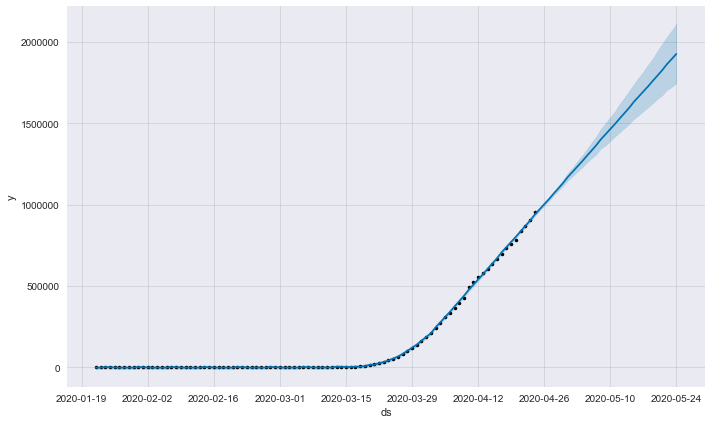

In [44]:
confirmed_forecast_plt = m.plot(forecast)

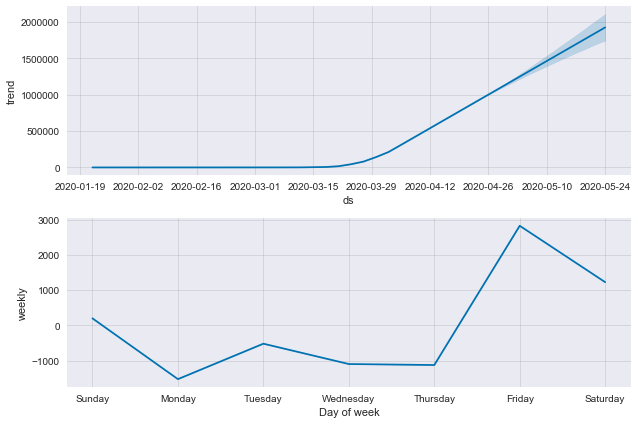

In [45]:
confirmed_forecast_plot = m.plot_components(forecast)

## Predicting upcoming death cases 

In [46]:
deaths = dbd_US.groupby('Date').sum()['Death Cases'].reset_index()
deaths.columns = ['ds','y']
deaths

ds      y
0  2020-01-22      0
1  2020-01-23      0
2  2020-01-24      0
3  2020-01-25      0
4  2020-01-26      0
..        ...    ...
89 2020-04-20  37795
90 2020-04-21  40316
91 2020-04-22  42496
92 2020-04-23  44516
93 2020-04-24  46503

[94 rows x 2 columns]

In [47]:
m = Prophet(interval_width = 0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods = 30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24

In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat    yhat_lower     yhat_upper
119 2020-05-20   96339.431949  87528.112615  104824.923435
120 2020-05-21   98306.312575  89035.469308  107508.466682
121 2020-05-22  100293.909037  90224.868996  110074.853449
122 2020-05-23  102051.138692  91672.038732  112255.460034
123 2020-05-24  104061.537096  93013.155925  114607.147379

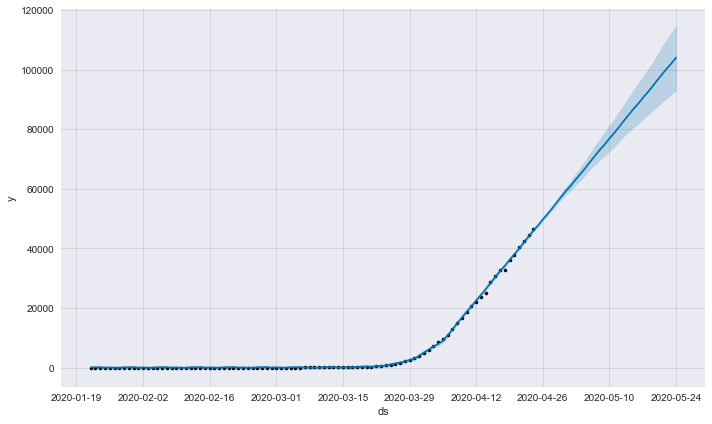

In [49]:
deaths_forecast_plot = m.plot(forecast)

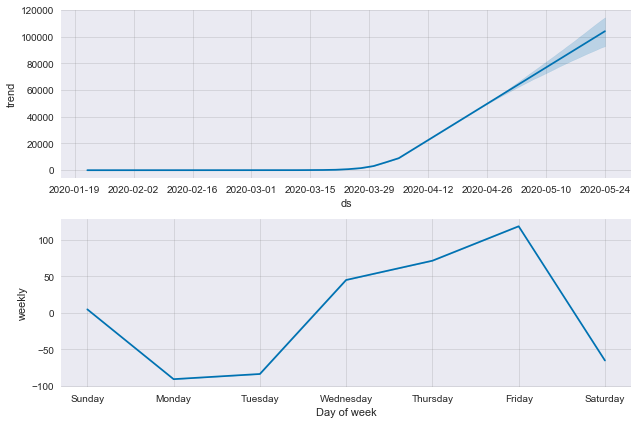

In [50]:
deaths_forecast_plot = m.plot_components(forecast)

## Predicting upcoming recovered cases

In [51]:
recovered_cases = dbd_US.groupby('Date').sum()['Recovered Cases'].reset_index()
recovered_cases.columns = ['ds', 'y']
recovered_cases

ds       y
0  2020-01-22       0
1  2020-01-23       0
2  2020-01-24       0
3  2020-01-25       0
4  2020-01-26       0
..        ...     ...
89 2020-04-20   77366
90 2020-04-21   80203
91 2020-04-22   99079
92 2020-04-23  100372
93 2020-04-24  106988

[94 rows x 2 columns]

In [52]:
m = Prophet(interval_width = 0.95)
m.fit(recovered_cases)
future = m.make_future_dataframe(periods = 30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24

In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
119 2020-05-20  211022.487377  189433.552746  232748.796863
120 2020-05-21  215325.160942  194126.279319  238585.284157
121 2020-05-22  219840.600197  196736.006403  243091.980620
122 2020-05-23  223990.217380  200393.245363  248715.897946
123 2020-05-24  227694.065029  202571.597297  253227.639455

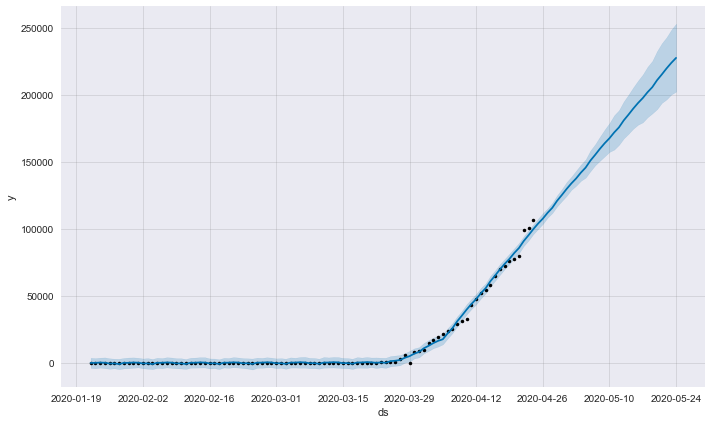

In [54]:
recovered_forecast_plot = m.plot(forecast)

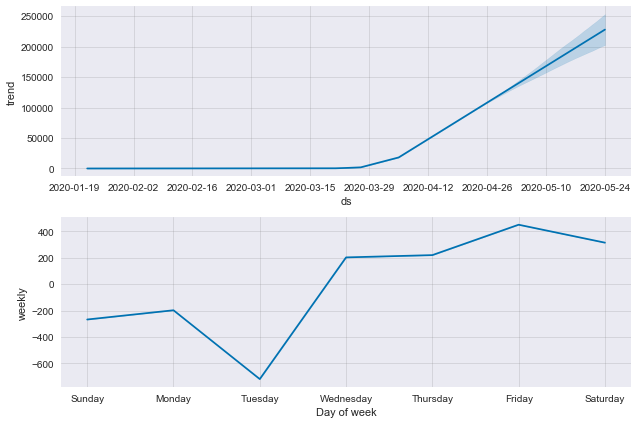

In [55]:
recovered_forecast_plot = m.plot_components(forecast)